In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [23]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")




In [25]:
df = pd.read_csv("Mall_Customers.csv")

In [27]:
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [29]:
X = df.select_dtypes(include=[np.number])


In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

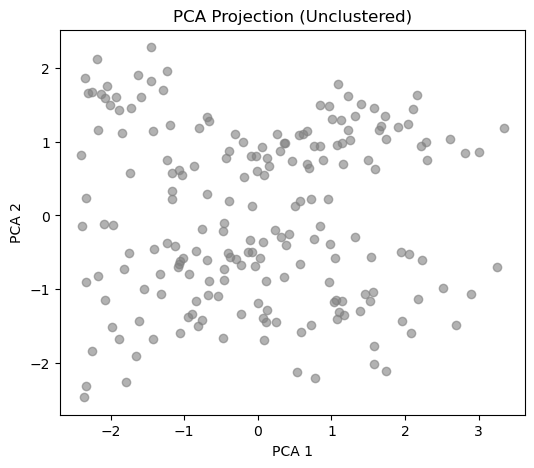

In [33]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='gray', alpha=0.6)
plt.title("PCA Projection (Unclustered)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

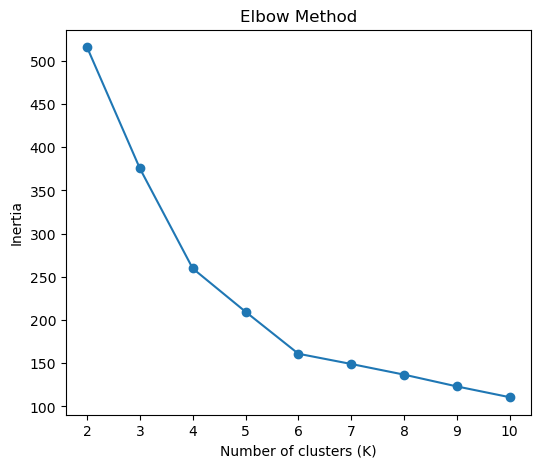

In [35]:
inertia = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6, 5))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.show()

In [37]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(X_scaled)


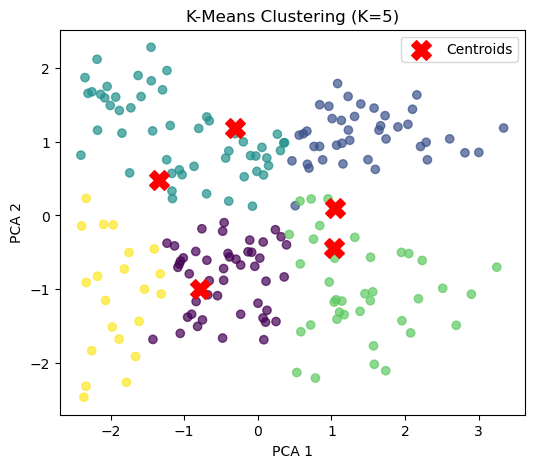

In [39]:
plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='Centroids')
plt.title(f"K-Means Clustering (K={optimal_k})")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()

In [41]:
score = silhouette_score(X_scaled, labels)
print(f"Silhouette Score for K={optimal_k}: {score:.4f}")

Silhouette Score for K=5: 0.4272
